#Testing Parapineal Ablation Data on a new Ipython notebook based Thunder script

##1. Get user input

In [7]:
#Provide Folder from which to get data
foldername = '/Users/seetha/Desktop/Parapineal_Ablation/Data/01_Zoom=2/Tiff/Sorted/Red_First/Fish1159/Block3/'

##2. Load Libraries

In [8]:
#Matplotlib plots to be inline in the notebook
%matplotlib inline

In [9]:
#Import Python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os
import glob
from progressbar import ProgressBar

In [10]:
#Import Thunder libraries
from thunder import Colorize
from thunder import ThunderContext
from pyspark import SparkConf, SparkContext
image = Colorize.image

##3. Run Thunder

In [2]:
# Create new config - To avoid maxResultSize error. 
conf = (SparkConf()
    .set("spark.driver.maxResultSize", "0"))

sc.stop()
# Create new thunder context using the configuration
tsc = ThunderContext.start(appName="thunderpca", conf=conf)

In [3]:
tsc = ThunderContext(sc) # Overcoming the missing jars issue - open pyspark first and then thunder using Spark context

##4. Set up Plotting

In [1]:
#Set seaborn plotting formats
sns.set_style('darkgrid')
sns.set_context('notebook')

NameError: name 'sns' is not defined

In [8]:
# Plot planes in the given image as subplot
def PlotImagePlanes(img):
    numz = np.size(img,2)
    num_subplots = int((math.ceil(numz / 2.) * 2)/2)

    fig1 = plt.figure(figsize=(10,5))
    for ii in xrange(0, numz):    
        ax1 = fig1.add_subplot(num_subplots,2,ii+1)
        ax1 = image(img[:,:,ii])    
        plt.title('Plane: ' + str(ii+1), fontsize=12)
    plt.show()

##5. Load Images from Folder using Thunder Context

In [9]:
#Load data as tif
data = tsc.loadImages(foldername, inputFormat='tif')

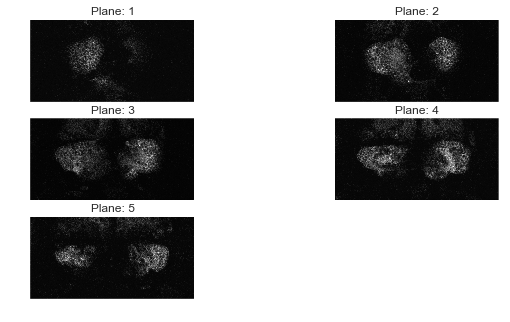

In [10]:
# Get the first image in data and plot
img = data.first()[1]
PlotImagePlanes(img)

In [11]:
# Print some info on the data
print 'Shape of first image: ' + str(np.shape(img))
print 'Number of dimensions of data ' + str(data.dims)
print 'Total number of time points ' + str(data.nrecords)

Shape of first image: (256, 512, 5)
Number of dimensions of data min=(0, 0, 0), max=(255, 511, 4), count=(256, 512, 5)
Total number of time points 285


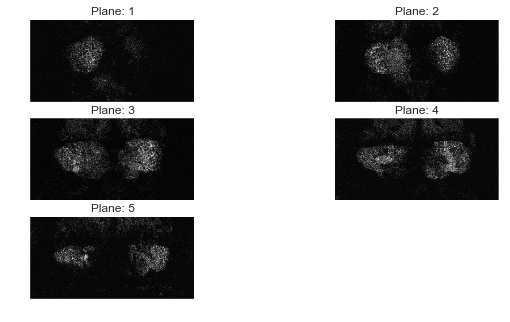

Shape of image number 28 : (256, 512, 5)


In [12]:
# Looking at images with paricular indices and plot
index = 28
img = data[index]
PlotImagePlanes(img)
print 'Shape of image number '+ str(index) + ' : '+ str(np.shape(img))

##6. Do some plotting - Max Projection of planes, Standard Deviations

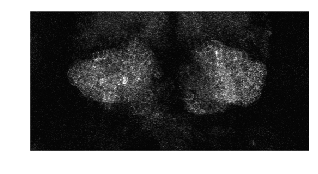

In [13]:
# Plot maximum projections and standard deviation
projs = data.maxProjection(axis=2)
img = projs[index]
fig1 = plt.figure(figsize=(5,5))
image(img)

In [14]:
img = data.stdev()

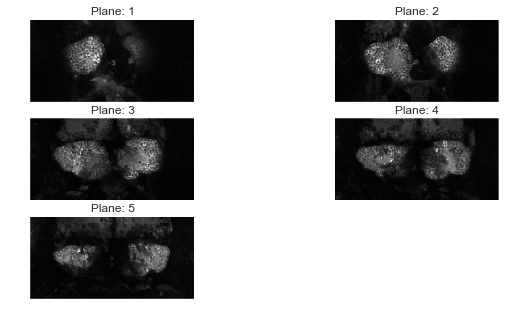

In [15]:
PlotImagePlanes(img)

In [11]:
print np.shape(img)

NameError: name 'img' is not defined

##8. Save as series

In [17]:
#Crete binary folder
binaryfolder = os.path.join(foldername, 'Binary_Files')
if not os.path.exists(binaryfolder):
        os.makedirs(binaryfolder)  
else:
    #Overwrite if binary file is present
    if glob.glob(binaryfolder+'/*.bin'):
        overwrite_flag = True
    else:
        overwrite_flag = False
        
print 'Saving to...' + binaryfolder

#Save to series
data.saveAsBinarySeries(binaryfolder, overwrite=overwrite_flag) #Warning: if overwrite=True the whole directory is erased

#Remove data and open as series
%reset_selective -f data

Saving to.../Users/seetha/Desktop/Parapineal_Ablation/Data/01_Zoom=2/Tiff/Sorted/Red_First/Fish1159/Block3/Binary_Files
